# Part 0

### Load stuff

In [2]:
import numpy as np
import os
import subprocess
import argparse

from pathlib import Path
from shutil import copyfile
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
import nibabel as nib
import nilearn as nil
from nilearn import datasets
import nilearn.plotting as plotting
fsaverage = datasets.fetch_surf_fsaverage(mesh='fsaverage')
from nilearn.image import load_img, math_img

/home/asathe/om2-home/anaconda3/envs/dti/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [4]:
from utils.parcel_utils import d_parcel_fsaverage, d_parcel_name_map
from utils.fmri_utils import subj_path, subj_FS_path

subj_path, subj_FS_path = map(Path, [subj_path, subj_FS_path])

loading /om/user/ehoseini/MyData/dti_language/ROIS_NOV2020//Func_Lang_LHRH_SN220/ROIS_in_fsaverge.pkl


In [4]:
d_parcel_fsaverage

{'lang': {'RH_AntTemp': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'RH_MFG': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'LH_IFG': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'RH_IFG': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'RH_AngG': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'LH_AngG': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'LH_MFG': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'RH_IFGorb': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'LH_PostTemp': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'LH_AntTemp': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'RH_PostTemp': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'LH_IFGorb': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  'all_ROIs': array([0, 0, 0, ..., 0, 0, 0]),
  'LH_ROIs': array([0, 0, 0, ..., 0, 0, 0]),
  'RH_ROIs': array([0, 0, 0, ..., 0, 0, 0])},
 'md': None,
 'dmn': None,
 'aud': None,
 'vis': None}

### Select parameters

In [5]:
my_env = os.environ.copy()
my_env['SUBJECTS_DIR'] = str(subj_FS_path)

subj_id = 'sub190'
network_id = 'lang'
threshold = 90
file_name = 'fsig'

hemis_ = hemis_short = ['LH', 'RH'] # shorthand version
hemis = hemis_long = ['left', 'right'] # longform version

# Part 1: select voxels based on overlap with langauge parcels
### find language-signinifant voxels in fsaverge space

iter over ROIs:   0%|          | 0/12 [00:00<?, ?it/s]

ROI name: LH_IFGorb, number of voxels 88
ROI name: LH_IFG, number of voxels 123
ROI name: LH_MFG, number of voxels 110
ROI name: LH_AntTemp, number of voxels 287
ROI name: LH_PostTemp, number of voxels 681
ROI name: LH_AngG, number of voxels 151
only extracting label Left_Cerebral_Exterior (1)
subject = fsaverage
annotation = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.lh.lang/S-v-N/LH_IFGorb_roi_fsig_90_fsavg.annot
hemi = lh
outdir = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.lh.lang/S-v-N
surface   = inflated

Reading surface 
 /mindhive/evlab/u/Shared/SUBJECTS_FS/FS/fsaverage/surf/lh.inflated
Loading annotations from /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.lh.lang/S-v-N/LH_IFGorb_roi_fsig_90_fsavg.annot
Seg base 0
max index = 1
  1     88 /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.lh.lang/S-v-N/lh.LH_IFGorb_roi.label
only extracting label Left_Cerebral_Exterior (1)
subject = fsaverage
annotation = /min

No such file or directory


only extracting label Left_Cerebral_Exterior (1)
subject = fsaverage
annotation = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N/RH_IFGorb_roi_fsig_90_fsavg.annot
hemi = rh
outdir = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N
surface   = inflated

ERROR: creating directory /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N


No such file or directory
No such file or directory


only extracting label Left_Cerebral_Exterior (1)
subject = fsaverage
annotation = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N/RH_IFG_roi_fsig_90_fsavg.annot
hemi = rh
outdir = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N
surface   = inflated

ERROR: creating directory /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N
only extracting label Left_Cerebral_Exterior (1)
subject = fsaverage
annotation = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N/RH_MFG_roi_fsig_90_fsavg.annot
hemi = rh
outdir = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N
surface   = inflated

ERROR: creating directory /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N


No such file or directory
No such file or directory


only extracting label Left_Cerebral_Exterior (1)
subject = fsaverage
annotation = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N/RH_AntTemp_roi_fsig_90_fsavg.annot
hemi = rh
outdir = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N
surface   = inflated

ERROR: creating directory /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N
only extracting label Left_Cerebral_Exterior (1)
subject = fsaverage
annotation = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N/RH_PostTemp_roi_fsig_90_fsavg.annot
hemi = rh
outdir = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N
surface   = inflated

ERROR: creating directory /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N
only extracting label Left_Cerebral_Exterior (1)
subject = fsaverage
annotation = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.rh.lang/S-v-N/RH_AngG_ro

No such file or directory


iter over ROIs:   0%|          | 0/12 [00:00<?, ?it/s]

ROI name: RH_IFGorb, number of voxels 79
ROI name: RH_IFG, number of voxels 149
ROI name: RH_MFG, number of voxels 115
ROI name: RH_AntTemp, number of voxels 291
ROI name: RH_PostTemp, number of voxels 764
ROI name: RH_AngG, number of voxels 123
only extracting label Left_Cerebral_Exterior (1)
subject = fsaverage
annotation = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.lh.lang/S-v-N/LH_IFGorb_roi_fsig_90_fsavg.annot
hemi = lh
outdir = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.lh.lang/S-v-N
surface   = inflated

Reading surface 
 /mindhive/evlab/u/Shared/SUBJECTS_FS/FS/fsaverage/surf/lh.inflated
Loading annotations from /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.lh.lang/S-v-N/LH_IFGorb_roi_fsig_90_fsavg.annot
Seg base 0
max index = 1
  1     88 /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.lh.lang/S-v-N/lh.LH_IFGorb_roi.label
only extracting label Left_Cerebral_Exterior (1)
subject = fsaverage
annotation = /min

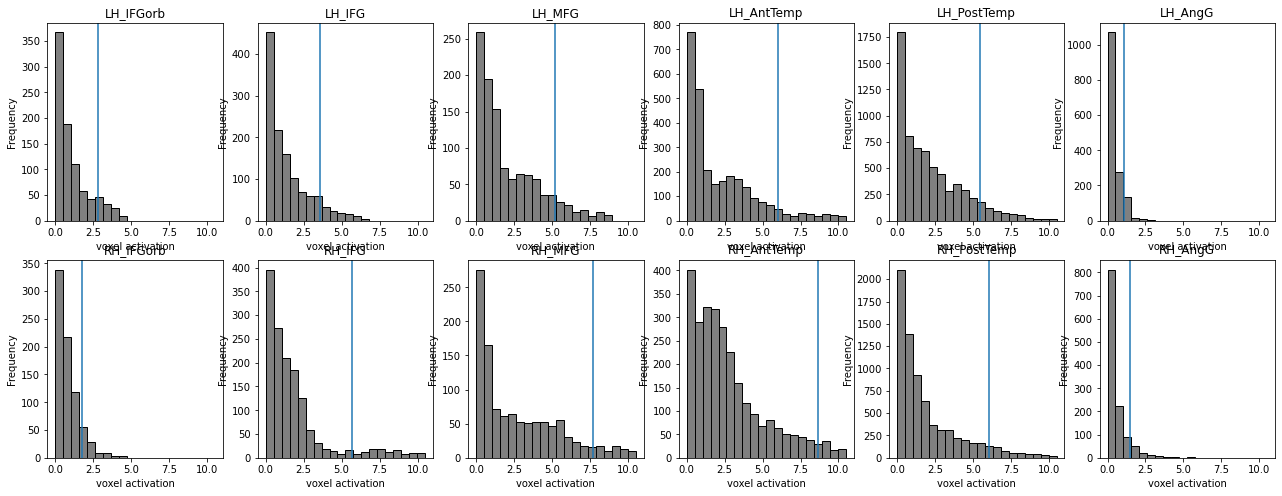

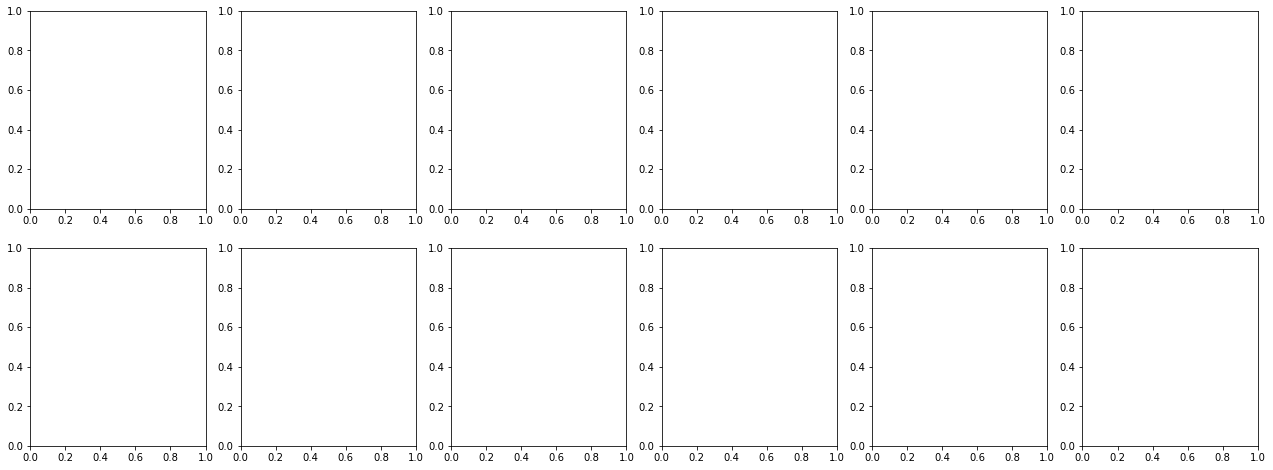

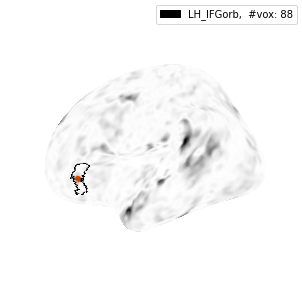

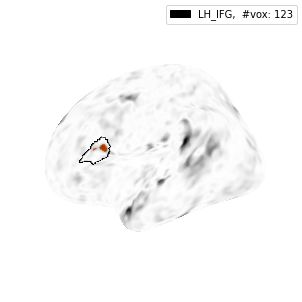

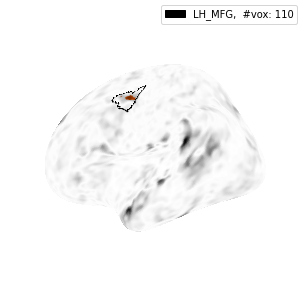

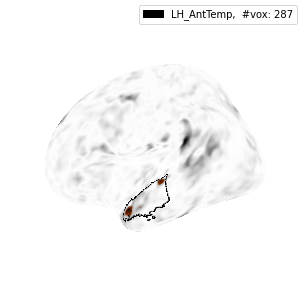

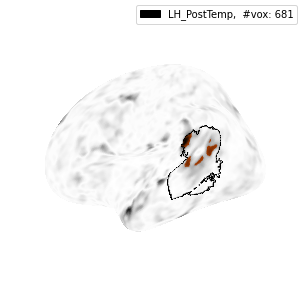

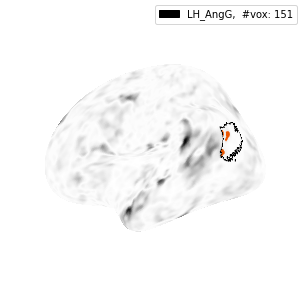

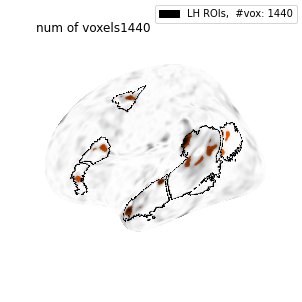

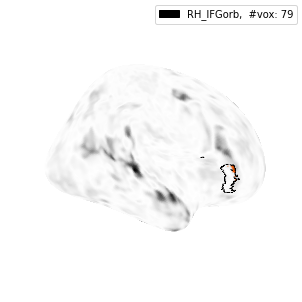

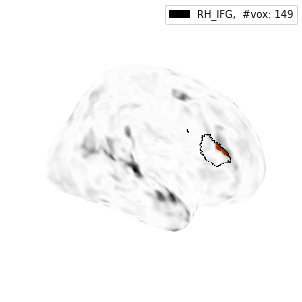

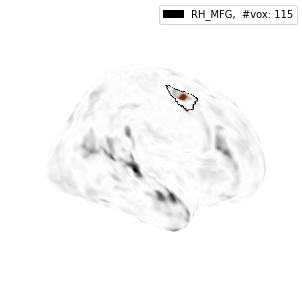

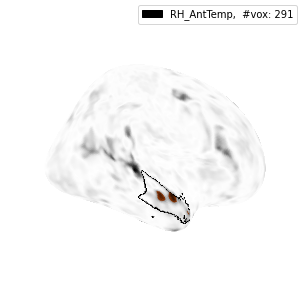

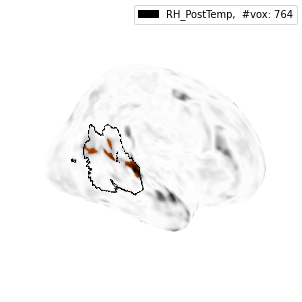

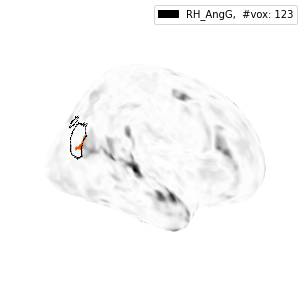

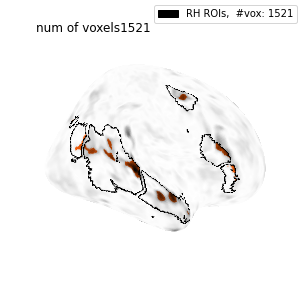

In [6]:

# a pyplot subplots to plot histograms across ROIs and hemis
fig_hist, ax_hist = plt.subplots(2, 6, figsize=(22, 8))
fig_brain, ax_brain = plt.subplots(2, 6, figsize=(22, 8))

for idx, hemi in enumerate(hemis_long):
    functional_path=f'bold.fsavg.sm4.{hemis_short[idx].lower()}.lang/S-v-N'


    # replacing the original FS directory stuff with the "archived" stuff, because the newly processed directories
    # are still missing certain files necessary for processing here (TODO: which files are missing? I think the 
    # bold/*.nii.gz onces)

    # sub_func_dir = os.path.join(subj_path, 'archive', 'n810_archived_18Oct2021',
    #                             subj_id, 'bold', functional_path, file_name+'.nii.gz')
    sub_func_dir = subj_path / subj_id / 'bold' / functional_path / (file_name+'.nii.gz')


    sub_dti_dir = os.path.join(subj_path, 'DTI', subj_id,functional_path)
    Path(sub_dti_dir).mkdir(parents=True, exist_ok=True)

    network_img = nib.load(sub_func_dir)
    network = np.asarray(network_img.dataobj).flatten()
    sub_parcel_roi_vxl = np.zeros(network.shape).astype(int)
    sub_parcel_roi = np.zeros(network.shape).astype(int)

    # plot surface data
    # create an annotation file from the activation masks
    for ix_roi, ROI_name in enumerate(tqdm(d_parcel_name_map[network_id].values(), desc='iter over ROIs')):
        if hemis_[idx] in ROI_name:
            roi_surf = d_parcel_fsaverage[network_id][ROI_name]
            samples = network[(roi_surf == 1) & ~(np.isnan(network))]
            samples_90 = np.percentile(samples, int(threshold))

            ax_hist[idx,ix_roi%6].hist(samples, bins=20, range=[0, 10.5], facecolor='gray', edgecolor='black', align='mid')
            # fig.tight_layout()
            ax_hist[idx,ix_roi%6].set_title(f'{ROI_name}')
            ax_hist[idx,ix_roi%6].set_xlabel("voxel activation")
            ax_hist[idx,ix_roi%6].set_ylabel("Frequency")
            ax_hist[idx,ix_roi%6].axvline(x=samples_90)
            # fig_hist.canvas.draw()
            fig_hist.savefig(str(Path(f'{sub_dti_dir}/../../{subj_id}_{ROI_name}_roi_{file_name}_{threshold}_voxels_histogram.png').resolve()))
            
            roi_voxels = ((roi_surf == 1)) & (network >= samples_90)
            print(f'ROI name: {ROI_name}, number of voxels {np.sum(roi_voxels)}')

            figure = plotting.plot_surf_roi(surf_mesh=fsaverage['infl_' + hemi], roi_map=roi_voxels,
                                            hemi=hemi, view='lateral', cmap='hot',
                                            bg_map=network, bg_on_data=True, alpha=.3,
                                            darkness=1)

            plotting.plot_surf_contours(fsaverage['infl_' + hemi], roi_surf, levels=[1, ], figure=figure,
                                        legend=True, colors=['k', ], labels=[f'{ROI_name},  #vox: {np.sum(roi_voxels)}'])

            figure.savefig(f'{sub_dti_dir}/{subj_id}_{ROI_name}_roi_{file_name}_{threshold}_fsavg.png',facecolor=(.7,.7,.7),edgecolor='none')
            

            # save individual annotation file and create label form them
            nib.freesurfer.write_annot(f'{sub_dti_dir}/{ROI_name}_roi_{file_name}_{threshold}_fsavg.annot',
                                       roi_voxels.astype(int), np.asarray([[0, 0, 0, 0, 0], [255, 0, 0, 255, 1]]),
                                       [b'???', f'{ROI_name}_roi'], fill_ctab=True)
            sub_parcel_roi_vxl += roi_voxels.astype(int)
            sub_parcel_roi += roi_surf
            
            
#             break


    # plot full ROI map
    figure = plotting.plot_surf_roi(surf_mesh=fsaverage['infl_' + hemi], roi_map=sub_parcel_roi_vxl,
                                    hemi=hemi, view='lateral', cmap='hot',
                                    bg_map=network, bg_on_data=True, alpha=.3,
                                    title=f'num of voxels{sub_parcel_roi_vxl.sum()}',
                                    darkness=1)


    plotting.plot_surf_contours(fsaverage['infl_' + hemi], sub_parcel_roi, levels=[1, ], figure=figure,
                                legend=True, colors=['k', ], labels=[f'{hemis_[idx]} ROIs,  #vox: {sub_parcel_roi_vxl.sum()}'])
    figure.savefig(f'{sub_dti_dir}/{subj_id}_{hemis_[idx]}_all_ROIs_{file_name}_{threshold}_fsavg.png',
                   facecolor=(.7, .7, .7), edgecolor='none')

    # make annotation to labels for easier transformation from average to native
    for idx, hemi in enumerate(hemis):
        functional_path = f'bold.fsavg.sm4.{hemis_[idx].lower()}.lang/S-v-N'
        sub_dti_dir = os.path.join(subj_path, 'DTI', subj_id, functional_path)
        for ROI_name in d_parcel_name_map[network_id].values():
            if ROI_name.__contains__(hemis_[idx]):
            # move from annot to label
                unix_pattern = ['mri_annotation2label',
                                '--hemi', hemis_[idx].lower(),
                                '--subject', 'fsaverage',
                                '--label', str(1),
                                '--outdir', f'{sub_dti_dir}',
                                '--annotation', f'{sub_dti_dir}/{ROI_name}_roi_{file_name}_{threshold}_fsavg.annot',
                                '--surface', 'inflated']
                output = subprocess.Popen(unix_pattern, env=my_env)
                output.communicate()
                
                
#                 break
#         break
#     break
                
plt.show()

In [ ]:
########## repeating the previous cell but with the union of the HCP labels per ROI used as a "ROI" contour



# Part 2: move labels from fsaverage to fsnative


srclabel = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsavg.sm4.lh.lang/S-v-N/lh.LH_IFGorb_roi.label
srcsubject = fsaverage
trgsubject = sub190
trglabel = /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsnative.sm4.lh.lang/S-v-N/lh.LH_IFGorb_roi.label
regmethod = surface

srchemi = lh
trghemi = lh
trgsurface = white
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
usehash = 1
Use ProjAbs  = 0, 0
Use ProjFrac = 0, 0
DoPaint 0

SUBJECTS_DIR    /mindhive/evlab/u/Shared/SUBJECTS_FS/FS
FREESURFER_HOME /home/asathe/download/freesurfer-7.2.0/freesurfer
Loading source label.
Found 88 points in source label.
Starting surface-based mapping
Reading source registration 
 /mindhive/evlab/u/Shared/SUBJECTS_FS/FS/fsaverage/surf/lh.sphere.reg
Rescaling ...  original radius = 100
Reading target surface 
 /mindhive/evlab/u/Shared/SUBJECTS_FS/FS/sub190/surf/lh.white
Reading target registration 
 /mindhive/evlab/u/Shared/SUBJECTS_FS/FS/sub190/surf/lh.sphere.reg
Rescaling ...  original radi

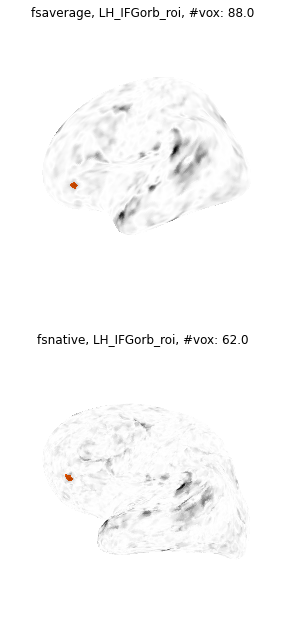

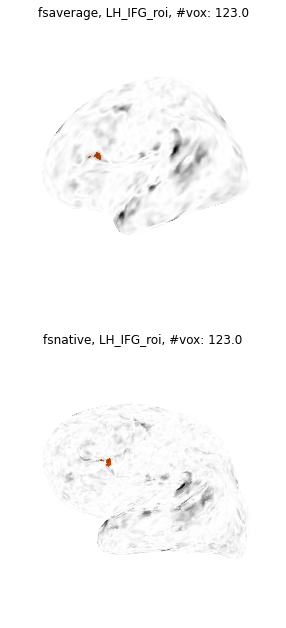

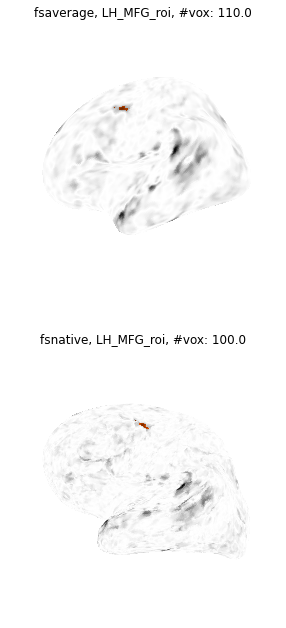

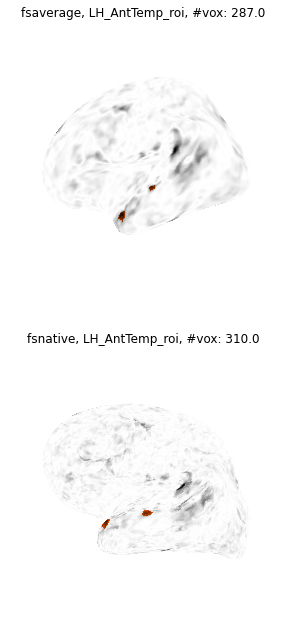

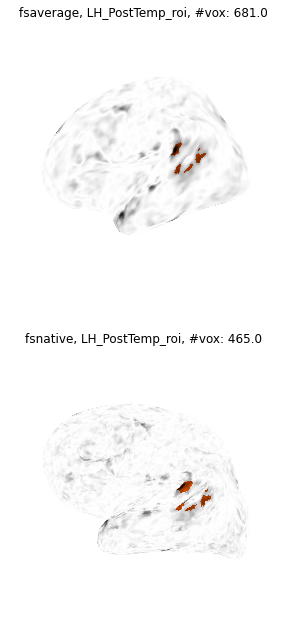

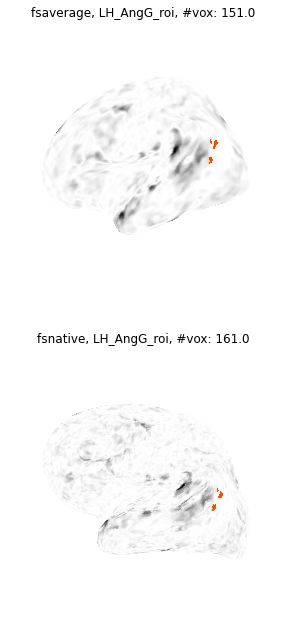

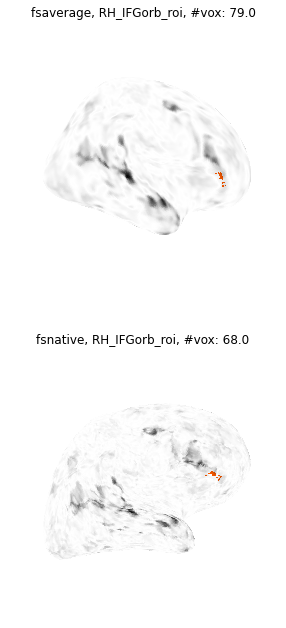

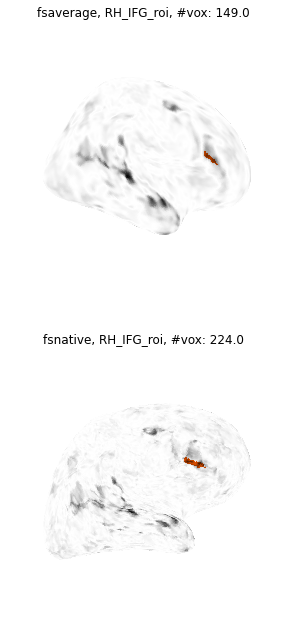

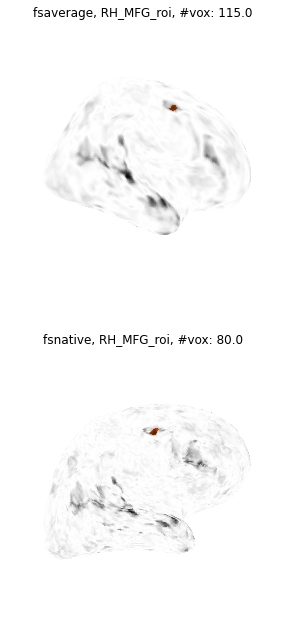

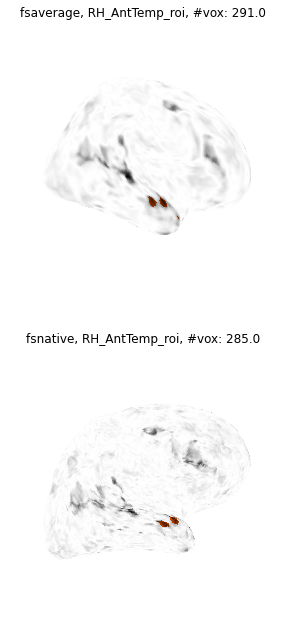

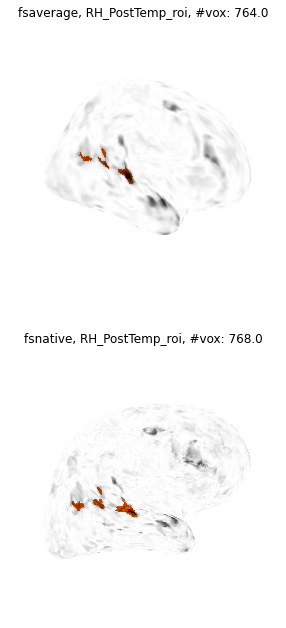

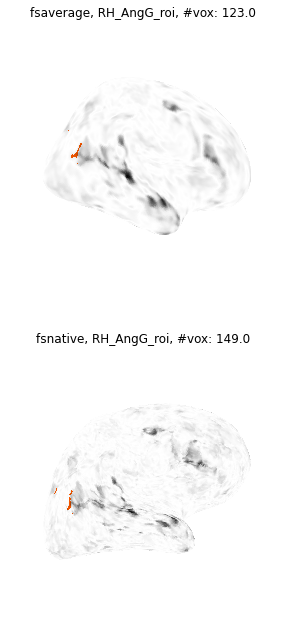

In [7]:
for idx, hemi in enumerate(hemis):
    functional_path = f'bold.fsavg.sm4.{hemis_[idx].lower()}.lang/S-v-N'
    sub_dti_dir = os.path.join(subj_path, 'DTI', subj_id, functional_path)
    p_target_dir = sub_dti_dir.replace('fsavg', 'fsnative')
    Path(p_target_dir).mkdir(parents=True, exist_ok=True)
    functional_native_path = functional_path.replace('fsavg', 'self')

    # sub_func_native_dir = os.path.join(subj_path, subj_id, 'bold', functional_native_path, file_name + '.nii.gz')
    ######!!! ^ didnt run for sub191, so tried making modificaiton below:
    # load subject fsaverage activation, this is for plotting only
    sub_func_dir = os.path.join(subj_path, 'archive', 'n810_archived_18Oct2021',
                                subj_id, 'bold', functional_path, file_name + '.nii.gz')
    network_img=nib.load(sub_func_dir)
    network_fsavg = np.asarray(network_img.dataobj).flatten()

    # load subject native activation, this is for plotting only
    sub_func_native_dir = os.path.join(subj_path, 'archive', 'n810_archived_18Oct2021',
                                       subj_id, 'bold', functional_native_path, file_name+'.nii.gz')
    network_native_img = nib.load(sub_func_native_dir)
    network_native = np.asarray(network_native_img.dataobj).flatten()

    subj_surf_file = Path(subj_FS_path, subj_id, 'surf', hemis_[idx].lower() + '.inflated')
    subj_sulc_file = Path(subj_FS_path, subj_id, 'surf', hemis_[idx].lower() + '.sulc')
#
    for ROI_name in d_parcel_name_map[network_id].values():
        if ROI_name.__contains__(hemis_[idx]):
            unix_pattern = ['mri_label2label',
                        '--srcsubject', 'fsaverage',
                         '--hemi', hemis_[idx].lower(),
                         '--srclabel', f'{sub_dti_dir}/{hemis_[idx].lower()}.{ROI_name}_roi.label',
                         '--trgsubject', subj_id,
                         #'--trgsurf', 'pial', # TODO :do we need this here ? this is for when the label in volume and need to be tranformed to surface
                         '--trglabel', f'{p_target_dir}/{hemis_[idx].lower()}.{ROI_name}_roi.label',
                         '--regmethod', 'surface']
            output = subprocess.Popen(unix_pattern, env=my_env)
            output.communicate()
            # plot the resulting surface

            #
            fig, ax = plt.subplots(nrows=2, ncols=1,subplot_kw={'projection': '3d'},figsize=[8,11])
            # plot fsaverage:
            label_roi = nib.freesurfer.read_label(f'{sub_dti_dir}/{hemis_[idx].lower()}.{ROI_name}_roi.label')
            network_fsaverage_ROI = np.zeros(network_fsavg.shape)
            network_fsaverage_ROI[label_roi] = 1
            plotting.plot_surf_roi(surf_mesh=fsaverage['infl_' + hemi], roi_map=network_fsaverage_ROI,
                                   hemi=hemi, view='lateral', cmap='hot',
                                   bg_map=network_fsavg, bg_on_data=True,
                                   darkness=1,axes=ax[0])
            ax[0].set_title(f'fsaverage, {ROI_name}_roi, #vox: {np.sum(network_fsaverage_ROI)}')
            # plot fs native
            label_roi = nib.freesurfer.read_label(f'{p_target_dir}/{hemis_[idx].lower()}.{ROI_name}_roi.label')
            network_fsnative_ROI = np.zeros(network_native.shape)
            network_fsnative_ROI[label_roi] = 1

            plotting.plot_surf_roi(str(subj_surf_file), roi_map=network_fsnative_ROI,
                                   hemi=hemi, view='lateral', cmap='hot',
                                   bg_map=network_native, bg_on_data=True,
                                   darkness=1,axes=ax[1]
                                   )
            ax[1].set_title(f'fsnative, {ROI_name}_roi, #vox: {np.sum(network_fsnative_ROI)}')

            fig.savefig(f'{p_target_dir}/{subj_id}_{hemis_[idx].lower()}.{ROI_name}_roi.png',edgecolor='none')
            
            # break
    # break
    
plt.show()

# Part 3 : transforming native label to volume for subject


### 3[A] tranform labels to annoation first

in step 3. processing hemisphere left.
Reading ctab /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsnative.sm4.lh.lang/S-v-N/lh_lang_roi_ctab.txt
Number of ctab entries 407

7.2.0
cwd /om/user/ehoseini/dti_language
cmdline mris_label2annot --s sub190 --h lh --ctab /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsnative.sm4.lh.lang/S-v-N/lh_lang_roi_ctab.txt --annot-path /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsnative.sm4.lh.lang/S-v-N/lh.lang_roi --surf orig --offset 400 --l /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsnative.sm4.lh.lang/S-v-N/lh.LH_IFGorb_roi.label --l /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsnative.sm4.lh.lang/S-v-N/lh.LH_IFG_roi.label --l /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsnative.sm4.lh.lang/S-v-N/lh.LH_MFG_roi.label --l /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsnative.sm4.lh.lang/S-v-N/lh.LH_AntTemp_roi.label --l /mindhive/evlab/u/Shared/SUBJECTS_FS/DTI/sub190/bold.fsnative.sm4.lh.l

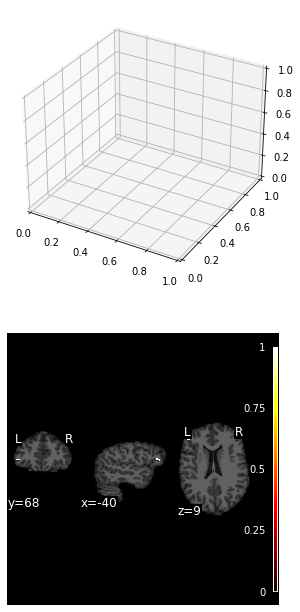

In [8]:
R_col=np.linspace(0, 255, len(d_parcel_name_map[network_id].values()), dtype=int)
G_col=np.flip(R_col)
# breakdown the areas based on hemisphere
from utils.lookuptable import FSLUT, _FSLUT_HEADER 
LUT_prime = _FSLUT_HEADER + '\n' + FSLUT
for idx, hemi in enumerate(hemis):
    
    print(f'in step 3. processing hemisphere {hemi}.')

    functional_path = f'bold.fsavg.sm4.{hemis_[idx].lower()}.lang/S-v-N'

    # https://github.com/freesurfer/freesurfer/blob/e34ae4559d26a971ad42f5739d28e84d38659759/mri_aparc2aseg/mri_aparc2aseg.cpp#L836
    # ACTUAL_OFFSET = {
    #       OFFSET + 1000,  if LH
    #       OFFSET + 2000,  if RH
    # }
    # these values are HARD-CODED in the freesurfer
    offset = 400 #*1000+1000*idx # results in 2000 for lh; 4000 for rh
    sub_dti_dir = os.path.join(subj_path, 'DTI', subj_id, functional_path)
    p_target_dir = sub_dti_dir.replace('fsavg', 'fsnative')
    ROI_names = list(d_parcel_name_map[network_id].values())
    hemi_rois_idx=np.where([x.__contains__(hemis_[idx]) for x in ROI_names])[0]

    # create a nicely formatted ctab file
    fmt = '{:<19} ' * 2 + '{: >5} ' * 4
    # txt_lines = ['#$Id: FreeSurferColorLUT.txt,v 1.38.2.1 2007/08/20 01:52:07 nicks Exp $',
    txt_lines = ['#$ Id: FreeSurferColorLUT_dti_evlab.txt, Fall 2021 $',
                 fmt.format('#No.','Label Name:','R','G','B','A'),
                 fmt.format(offset, 'Unknown', 0, 0, 0, 0)
                ]

    LUT_prime += '\n' + fmt.format(offset+1000+(1000*idx), 'Unknown', 0, 0, 0, 0)
    for idy, y in enumerate(hemi_rois_idx):
        txt_lines.append(fmt.format(idy+offset+1, ROI_names[y], R_col[y], G_col[y], 0, 1))
        # does what freesurfer does internally to the indices it reads from the ctab files.
        # for LH, we want to transform x -> x + 1000 + offset if LH, else x + 2000 + offset
        LUT_prime += '\n' + fmt.format(idy+offset+1+1000+(1000*idx), ROI_names[y], R_col[y], G_col[y], 0, 1)
    with open(f'{p_target_dir}/{hemis_[idx].lower()}_{network_id}_roi_ctab.txt', "w") as textfile:
        for element in txt_lines:
            textfile.write(element + "\n")

    # create the unix pattern to run mri_label2annot command:
    unix_pattern = ['mris_label2annot',
                    '--s', subj_id,
                    '--h', hemis_[idx].lower(),
                    '--ctab', f'{p_target_dir}/{hemis_[idx].lower()}_{network_id}_roi_ctab.txt',
                    '--annot-path', f'{p_target_dir}/{hemis_[idx].lower()}.{network_id}_roi',
                    # NOTE: we do not observe any difference in the output generated using the
                    # --surf pial or --surf orig flags. we may use either one.
                    '--surf', 'orig', # '--surf', 'orig',
                    '--offset', f'{offset}' # NOTE: expects offset of 0 for lh and rh
                    ]
    
    for idy, y in enumerate(hemi_rois_idx):
        unix_pattern.append('--l'),
        unix_pattern.append(f'{p_target_dir}/{hemis_[idx].lower()}.{ROI_names[y]}_roi.label')
       
        
    output = subprocess.Popen(unix_pattern, env=my_env)
    output.communicate()


    
sub_dti_dir = os.path.join(subj_path, 'DTI', subj_id, functional_path)
p_target_dir = sub_dti_dir.replace('fsavg', 'fsnative')
with open(f'{os.path.join(subj_path, "DTI", subj_id)}/FSColorLUT_with_{network_id}_rois.txt', "w") as ctab:
    ctab.write(LUT_prime)

# 3.B move from annotation in surface to volume
for idx, hemi in enumerate(hemis):
    functional_path = f'bold.fsavg.sm4.{hemis_[idx].lower()}.lang/S-v-N'
    sub_dti_dir = os.path.join(subj_path, 'DTI', subj_id, functional_path)
    p_target_dir = sub_dti_dir.replace('fsavg', 'fsnative')

    Path(f'{subj_FS_path}/{subj_id}/label/').mkdir(parents=True, exist_ok=True)
    copyfile(f'{p_target_dir}/{hemis_[idx].lower()}.{network_id}_roi.annot',
             f'{subj_FS_path}/{subj_id}/label/{hemis_[idx].lower()}.{network_id}_roi.annot')


# output a unified volume file (for both hemispheres) at the root of the fsnative folder 
# need to only do this once for the subject
unix_pattern = ['mri_aparc2aseg',
                '--s', subj_id,
                '--o', f'{str(Path(p_target_dir).parent.parent)}/x.fsnative.{network_id}_roi.nii.gz',
                '--annot', f'{network_id}_roi'
                ]

output = subprocess.Popen(unix_pattern, env=my_env)
output.communicate()
# do some plotting here
subj_vol_path=os.path.join(subj_FS_path,subj_id,'mri','brain.mgz')

fig, ax = plt.subplots(nrows=2, ncols=1, subplot_kw={'projection': '3d'}, figsize=[8, 11])
test_img=load_img(f'{str(Path(p_target_dir).parent.parent)}/x.fsnative.{network_id}_roi.nii.gz')
mask=math_img('np.logical_and(img>1400,img<=1401)', img=test_img)

plotting.plot_stat_map(mask, bg_img=subj_vol_path, axes=ax[1], display_mode='ortho', draw_cross=False)
plt.show()

In [9]:
img = load_img(f'{str(Path(p_target_dir).parent.parent)}/x.fsnative.{network_id}_roi.nii.gz')
hcp = load_img(f'/om/user/ehoseini/dti_language/glasser_to_native/out/glasser_sub190/HCP-MMP1.nii.gz')

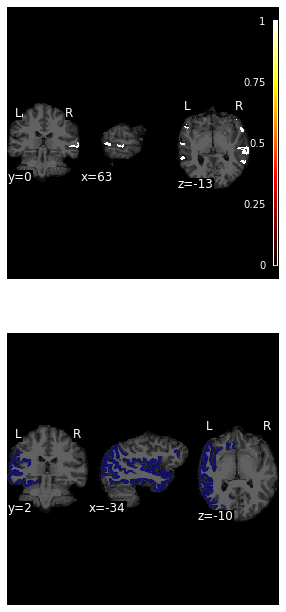

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, subplot_kw={'projection': '3d'}, 
                       figsize=[13, 51])

plotting.plot_stat_map(math_img(f'np.logical_or(np.logical_and(1400<img,img<=1406), np.logical_and(2400<img,img<=2406))', img=img), 
                       bg_img=os.path.join(subj_FS_path, subj_id, 'mri', 'brain.mgz'), axes=ax[0], display_mode='ortho', draw_cross=0)

plotting.plot_roi(math_img(f'np.logical_and(1100<img,img<=1200)', img=hcp), 
                  bg_img=os.path.join(subj_FS_path, subj_id, 'mri', 'brain.mgz'), 
                  cut_coords=None, output_file=None, display_mode='ortho', 
                  figure=fig, axes=ax[1], title=None, annotate=True, draw_cross=False, black_bg=True, threshold=0.5, alpha=0.7, 
                  dim='auto', vmin=None, vmax=None, resampling_interpolation='nearest', view_type='continuous', linewidths=2.5)